In [1]:
from __future__ import absolute_import, division, print_function

#Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper Lib
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 12s 3us/step


In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [10]:
print('train_images type:',type(train_images))
print('train_images shape:',train_images.shape)
print('train_labels type', type(train_labels))
print('train_labels shape', len(train_labels))


train_images type: <class 'numpy.ndarray'>
train_images shape: (60000, 28, 28)
train_labels type <class 'numpy.ndarray'>
train_labels shape 60000


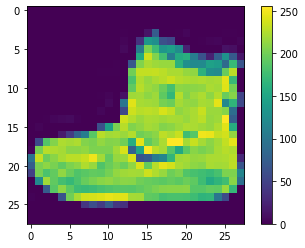

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0


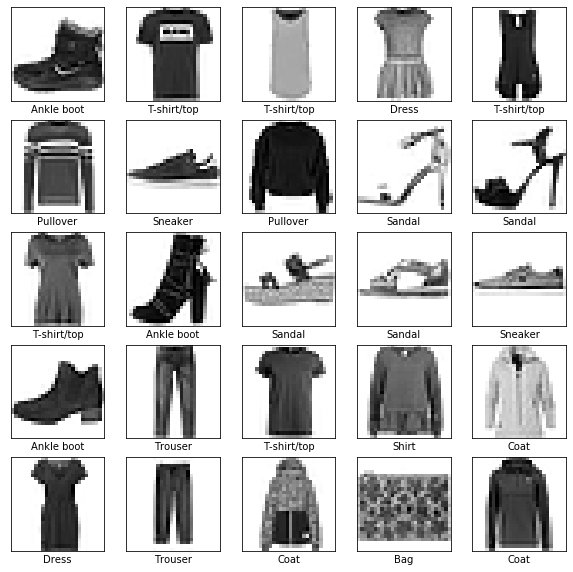

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4995 - acc: 0.8242
Epoch 2/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3785 - acc: 0.8625
Epoch 3/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3401 - acc: 0.8765
Epoch 4/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3139 - acc: 0.8848
Epoch 5/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2941 - acc: 0.8916
Epoch 6/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2791 - acc: 0.8975
Epoch 7/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2680 - acc: 0.8996
Epoch 8/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2560 - acc: 0.9046
Epoch 9/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2457 - acc: 0.9085
Epoch 10/10
60000/60000 [==============================] - 6s 92us/sample - los

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


10000/10000 [==============================] - 0s 46us/sample - loss: 0.3272 - acc: 0.8847
Test accuracy: 0.8847


In [25]:
predictions = model.predict(test_images)
print(predictions.shape)
print(type(predictions))
print(predictions[0])
np.argmax(predictions[0])
print(test_labels[0])


(10000, 10)
<class 'numpy.ndarray'>
[1.9810448e-06 1.9089676e-10 1.3012028e-07 4.0540016e-09 7.4332945e-08
 1.0446102e-02 8.9517741e-08 1.4663824e-03 4.8040945e-08 9.8808515e-01]
9


In [26]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  #disable ticks
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  

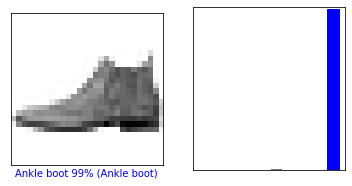

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


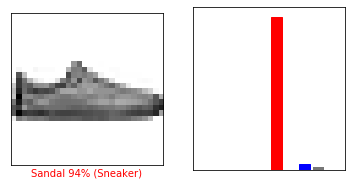

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


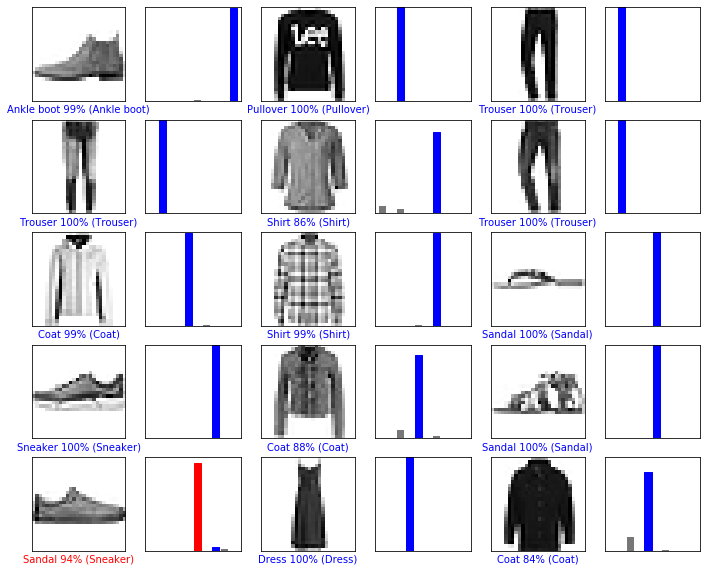

In [29]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()
